### Ivy(Yacheng) Qiu

# 0.) Import the Credit Card Fraud Data From CCLE

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("fraudTest.csv")

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/mb/wjt8hm2x6m7bzccp_0q8zw500000gn/T/ipykernel_56496/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/mb/wjt8hm2x6m7bzccp_0q8zw500000gn/T/ipykernel_56496/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [53]:
X

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,29.84,302,33,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,41.28,34496,53,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,60.05,54767,15,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,3.19,1126,17,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,519,7,False,False,False,False,False,True,False,False,False,False,False,False,False,False
555715,111.84,28739,9,False,False,False,False,False,False,False,True,False,False,False,False,False,False
555716,86.88,3684,15,False,False,False,False,False,False,False,True,False,False,False,False,False,False
555717,7.99,129,24,False,False,False,False,False,False,False,False,False,False,False,False,False,True


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [59]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_holdout_scaled = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [64]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [65]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

In [66]:
len(y_train)

389003

In [67]:
sum(y_train == 1)

1521

In [68]:
sum(y_train == 0)

387482

In [69]:
len(under_y)

3042

In [70]:
len(smote_y)

774964

In [71]:
len(over_y)

774964

# 3.) Train three logistic regression models

In [23]:
from sklearn.linear_model import LogisticRegression

In [72]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [73]:
over_log.score(X_test, y_test)

0.8120036469205115

In [74]:
under_log.score(X_test, y_test)

0.8162623863336452

In [75]:
smote_log.score(X_test, y_test)

0.818745651287219

In [ ]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [ ]:
# Sensitivity here in credit fraud is more important as seen from last class

In [28]:
from sklearn.metrics import confusion_matrix

In [76]:
y_true = y_test

In [77]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[67442, 15602],
       [   69,   245]])

In [78]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7802547770700637


In [79]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[67798, 15246],
       [   70,   244]])

In [80]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7770700636942676


In [81]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[68005, 15039],
       [   70,   244]])

In [82]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7770700636942676


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [83]:
raw_temp = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis =1)

In [84]:
raw_temp.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud
392528,18.52,2135,40,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0
200728,6.57,2258,11,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
349953,36.46,93193,2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0
158332,20.22,564,52,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0
37567,51.24,885,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0


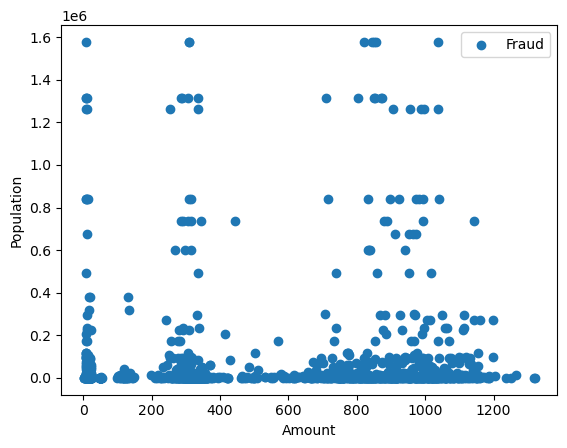

In [85]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [86]:
raw_temp = pd.concat([smote_X, smote_y], axis =1)

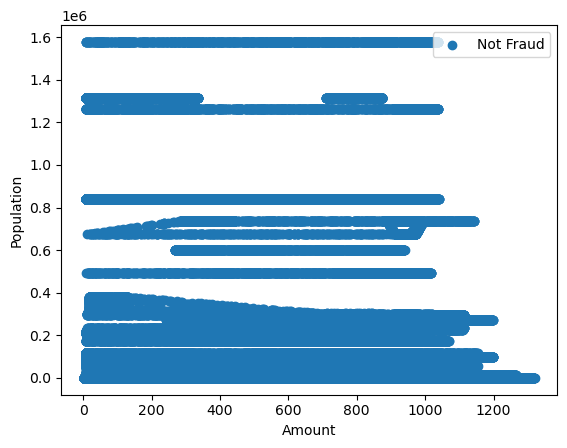

In [87]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [89]:
resampling_methods = {
    "over" : RandomOverSampler(),
    "under" : RandomUnderSampler(),
    "smote" : SMOTE()
}

model_configs = {
    "LOG" : LogisticRegression(),
    "LASSO" : LogisticRegression(penalty = "l1", solver = "liblinear", C = .5),
    "DecisionTree" : DecisionTreeClassifier()
}

In [91]:
trained_models = {}
results = []

In [93]:
def cal_perf_metrics(y_true, y_pred):
    
    tp, fp, fn, tn = confusion_matrix(y_true, y_pred).ravel()
    
    sensitivity = tp / (tp+fn)
    
    specificity = tn / (tn+fp)
    
    precision = precision_score(y_true, y_pred)
    
    recall = recall_score(y_true, y_pred)
    
    f1 =  f1_score(y_true, y_pred)


    return(sensitivity, specificity, precision, recall, f1)

In [95]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_name, model in model_configs.items():
        
        combined_key = f"{resample_key}_{model_name}"
        
        m = model.fit(resample_X, resample_y)
        
        trained_models[combined_key] = m 
        
        y_pred = m.predict(X_test)
    
        sensitivity, specificity, precision, recall, f1 = cal_perf_metrics(y_test, y_pred)
    
        results.append({"Model": combined_key,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "Precision": precision,
            "Recall": recall,
            "F1" : f1})

In [98]:
results = pd.DataFrame(results)
results

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.998978,0.015481,0.015481,0.780255,0.030359
1,over_LASSO,0.998935,0.028467,0.028467,0.745223,0.054839
2,over_DecisionTree,0.998290,0.577181,0.577181,0.547771,0.562092
3,under_LOG,0.998968,0.015714,0.015714,0.777070,0.030804
4,under_LASSO,0.998933,0.041682,0.041682,0.735669,0.078893
5,under_DecisionTree,0.999771,0.061590,0.061590,0.942675,0.115625
6,smote_LOG,0.998972,0.015958,0.015958,0.777070,0.031274
7,smote_LASSO,0.998918,0.111881,0.111881,0.719745,0.193659
8,smote_DecisionTree,0.998878,0.500000,0.500000,0.703822,0.584656


In [101]:
trained_models

{'over_LOG': LogisticRegression(),
 'over_LASSO': LogisticRegression(C=0.5, penalty='l1', solver='liblinear'),
 'over_DecisionTree': DecisionTreeClassifier(),
 'under_LOG': LogisticRegression(),
 'under_LASSO': LogisticRegression(C=0.5, penalty='l1', solver='liblinear'),
 'under_DecisionTree': DecisionTreeClassifier(),
 'smote_LOG': LogisticRegression(),
 'smote_LASSO': LogisticRegression(C=0.5, penalty='l1', solver='liblinear'),
 'smote_DecisionTree': DecisionTreeClassifier()}